In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load the dataset object from scikit-learn
iris_bunch = load_iris()

# The measurement data (our 4 features) is in the .data attribute
X = iris_bunch.data

# The species labels (0, 1, or 2) are in the .target attribute
y = iris_bunch.target

print(iris_bunch.feature_names)
print(iris_bunch.target_names)
print(iris_bunch.DESCR)
print(iris_bunch)

print("Shape of our feature data (X):", X.shape)
print("Example of the first flower's data:", X[0])
print("Example of the first flower's species (y):", y[0])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ==

In [ ]:
stdData = (X - X.mean(axis=0)) / X.std(axis=0)
covariance = np.cov(stdData.T)

print("covariance\n", covariance)


covariance
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


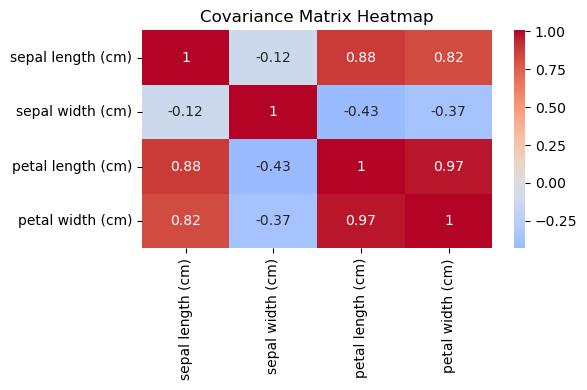

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the covariance matrix
plt.figure(figsize=(6, 4))
sns.heatmap(covariance, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            xticklabels=iris_bunch.feature_names,
            yticklabels=iris_bunch.feature_names)
plt.title('Covariance Matrix Heatmap')
plt.tight_layout()
plt.show()

In [35]:
eigenvalues, eigenvectors = np.linalg.eig(covariance)

print("eigenvalues\n", iris_bunch.feature_names, "\n", eigenvalues)

print("variance in dataset:", sum(eigenvalues))
print("PC1 variance:", ((eigenvalues[0]/sum(eigenvalues))*100).round(2), "%")
print("PC2 variance:", ((eigenvalues[1]/sum(eigenvalues))*100).round(2), "%")
print("First 2 Principal Components:", (((eigenvalues[0] + eigenvalues[1])/sum(eigenvalues))*100).round(2), "%")
# Just these 2 alone capture 95.8% of the variance in the dataset drastically simplifying the data

top_two_pcs = eigenvectors[:, :2]
X_pca = stdData @ top_two_pcs

eigenvalues
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 [2.93808505 0.9201649  0.14774182 0.02085386]
variance in dataset: 4.026845637583889
PC1 variance: 72.96 %
PC2 variance: 22.85 %
First 2 Principal Components: 95.81 %


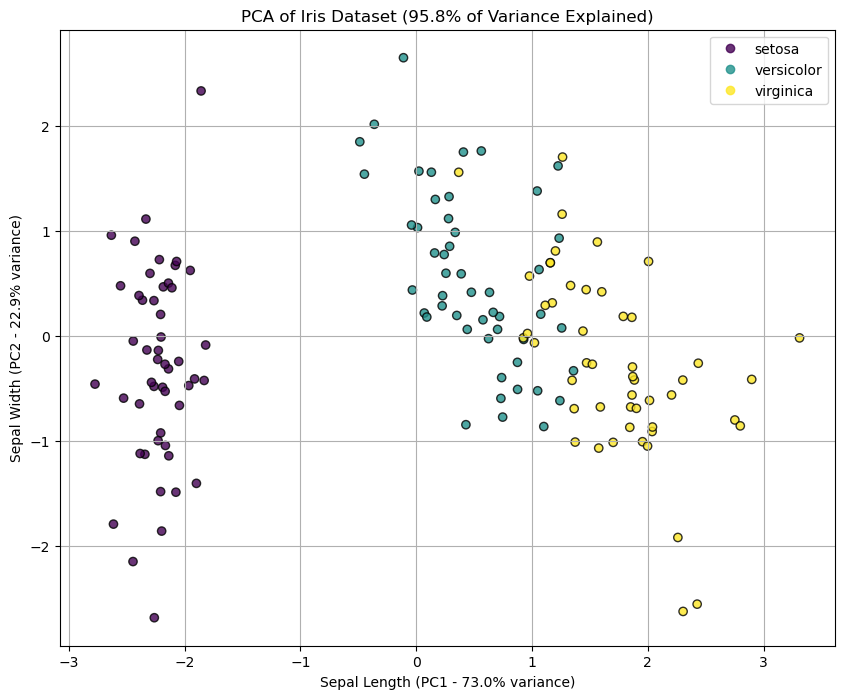

In [ ]:
plt.figure(figsize=(10, 8))

# We create a scatter plot of our new 2D data
# We use 'c=y' to color each point by its species
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.8)

plt.title('PCA of Iris Dataset (95.8% of Variance Explained)')
plt.xlabel(f'First Principal Component (PC1 - { (eigenvalues[0]/np.sum(eigenvalues))*100 :.1f}% variance)')
plt.ylabel(f'Second Principal Component (PC2 - { (eigenvalues[1]/np.sum(eigenvalues))*100 :.1f}% variance)')
plt.grid(True)

# Add a legend for the species
plt.legend(handles=scatter.legend_elements()[0], labels=iris_bunch.target_names.tolist())
plt.show()


Generating pair plot of original data...


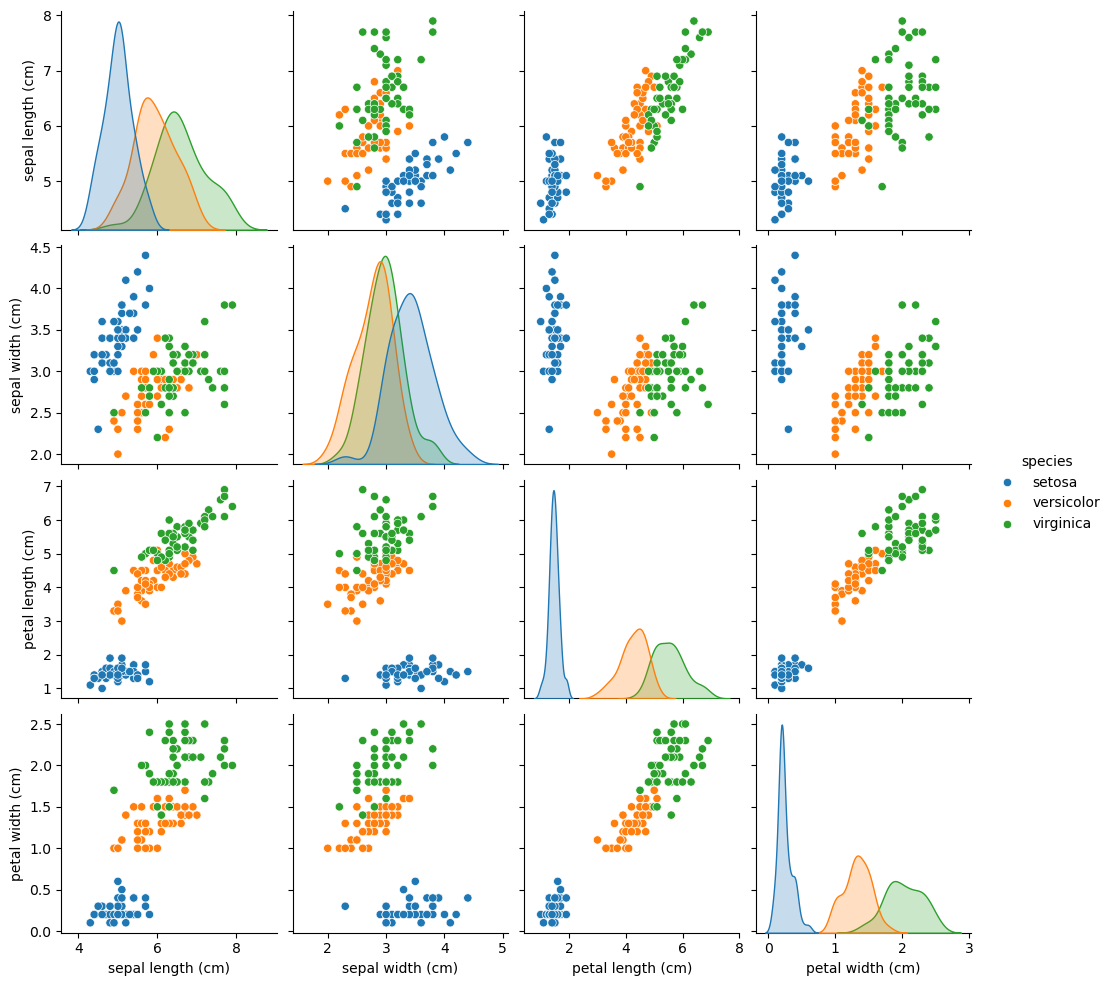

In [45]:
iris_df = pd.DataFrame(X, columns=iris_bunch.feature_names)
iris_df['species'] = pd.Categorical.from_codes(y, iris_bunch.target_names)

# --- Create the Pair Plot ---
print("Generating pair plot of original data...")
# sns.pairplot creates a grid of scatterplots for each pair of features.
# 'hue="species"' is the magic part that colors each point by its species.
sns.pairplot(iris_df, hue='species')
plt.show()

New flower's PCA coordinates: [-2.28718778 -0.43423303]


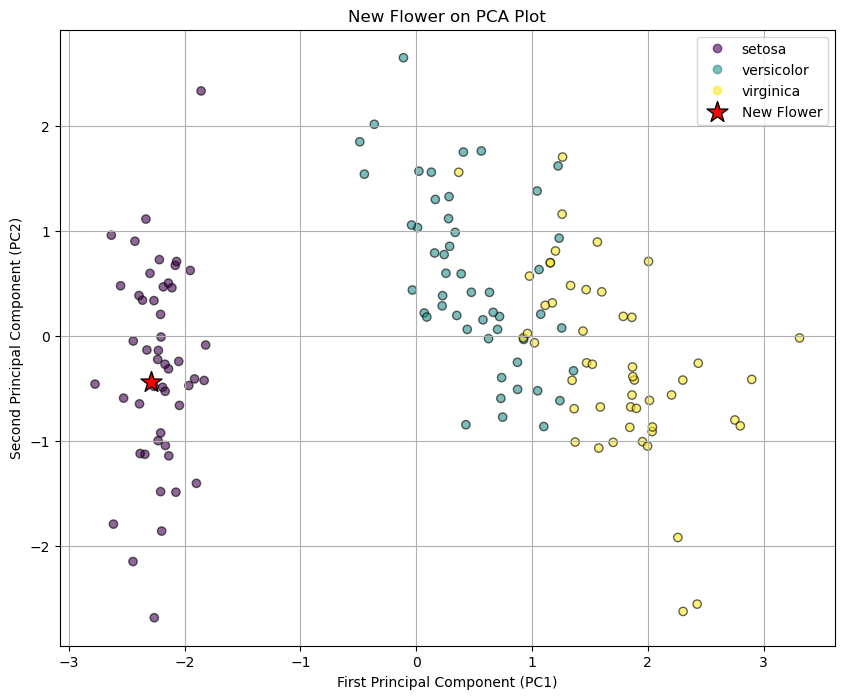

In [47]:
new_flower = np.array([5.0, 3.5, 1.5, 0.2])

original_mean = X.mean(axis=0)
original_std = X.std(axis=0, ddof=1)
new_flower_scaled = (new_flower - original_mean) / original_std

new_flower_pca = new_flower_scaled @ top_two_pcs

print("New flower's PCA coordinates:", new_flower_pca)

plt.figure(figsize=(10, 8))
# Plot the original PCA data
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.6)
# Plot the new point as a large red star
plt.scatter(new_flower_pca[0], new_flower_pca[1], c='red', marker='*', s=250, edgecolor='black', label='New Flower')

plt.title('New Flower on PCA Plot')
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.grid(True)
# Create a combined legend
handles, labels = scatter.legend_elements()
plt.legend(handles=handles + [plt.scatter([],[], c='red', marker='*', s=250, edgecolor='black')], labels=iris_bunch.target_names.tolist() + ['New Flower'])
plt.show()

Shape of the new data: (150, 2)

Total variance explained by 2 components: 95.81%

Principal Components:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]

Generating final plot...


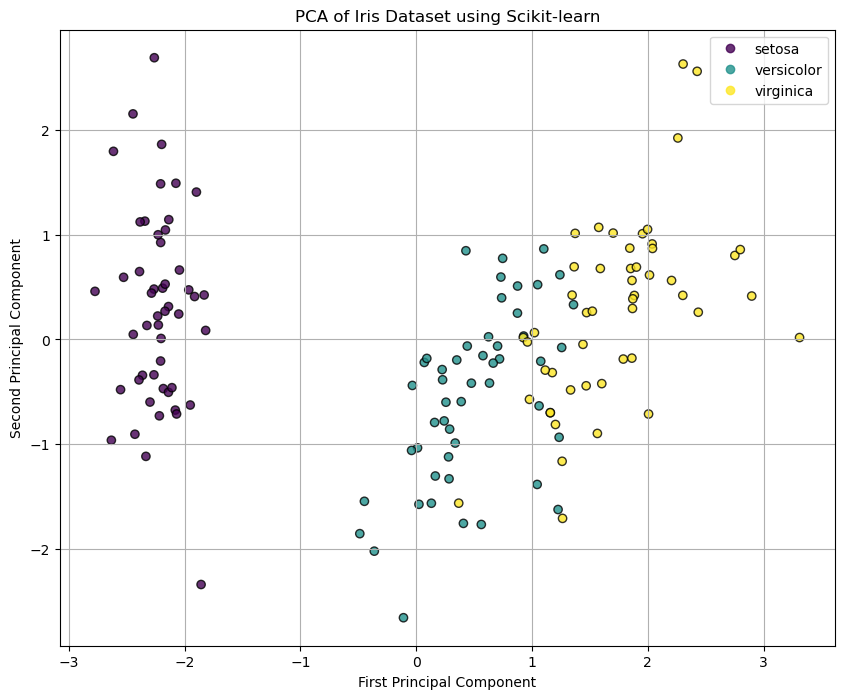

In [48]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# --- 1. Load and Scale the Data ---
# It's still best practice to scale the data first.
iris = load_iris()
X = iris.data
y = iris.target
X_scaled = StandardScaler().fit_transform(X)

# --- 2. Create and Run the PCA Model ---
# We create a PCA object and tell it we want to reduce to 2 dimensions.
pca = PCA(n_components=2)

# This one line does ALL the work we did manually:
# It finds the principal components and projects the data.
X_pca_sklearn = pca.fit_transform(X_scaled)

# --- 3. Explore the Results ---
print("Shape of the new data:", X_pca_sklearn.shape)

# You can look inside the 'pca' object to see the results.
# This is the same as the explained variance ratio we calculated.
print(f"\nTotal variance explained by 2 components: {np.sum(pca.explained_variance_ratio_)*100:.2f}%")

# These are the principal components (the eigenvectors).
print("\nPrincipal Components:\n", pca.components_)

# --- 4. Visualize the Result ---
print("\nGenerating final plot...")
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_sklearn[:, 0], X_pca_sklearn[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.8)
plt.title('PCA of Iris Dataset using Scikit-learn')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)
plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names.tolist())
plt.show()